# Graphic user interface with OpenCv

In [24]:
# Open image in openCv
import numpy as np
import matplotlib.pyplot as plt
import cv2
%matplotlib inline

## 1.Getting start with Image

### 1.1 Open image in notebook
#### OpenCV default read image as BGR while matplot lib expect image as RGB
#### IMREAD_COLOR loads the RGB image in the BGR 8-bit format. This is the default that is used here.
#### IMREAD_UNCHANGED loads the ARGB image as is (including the alpha channel if present)
#### IMREAD_GRAYSCALE loads the RGB image as an intensity one

In [2]:
# error while read img with wrong path
img = cv2.imread('acg.jpg',cv2.IMREAD_COLOR)
# produce no waarning but the result is nonetype not numpy
print(type(img))

<class 'NoneType'>


<class 'numpy.ndarray'>


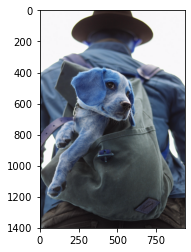

In [3]:
# check your path wehther its is correct
img = cv2.imread('DATA/dog_backpack.jpg',cv2.IMREAD_COLOR)
plt.imshow(img)
print(type(img))

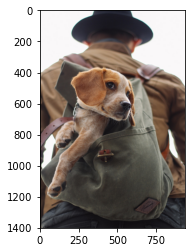

In [4]:
# chnage BRG to RGB to fit with matplotlib
img_rgb = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)

In [5]:
img = cv2.imread('DATA/dog_backpack.jpg',cv2.IMREAD_UNCHANGED)
img_rgb = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
img.shape

(1401, 934, 3)

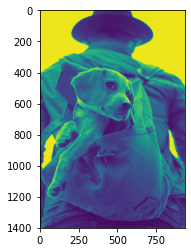

In [6]:
# grayscale visualize
img_gray = cv2.imread('DATA/dog_backpack.jpg',cv2.IMREAD_GRAYSCALE)
plt.imshow(img_gray) # not gray
# default color map of matplotlib will map gray to blue and yellow

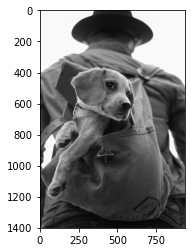

In [7]:
# we need to chang the colormapping of matplotlib
plt.imshow(img_gray,cmap='gray')

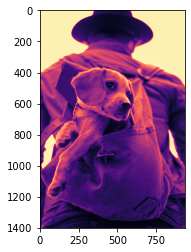

In [8]:
# Thetre are many colormap in martplotlib
# shuould use cmap for mpping color of grayscale
plt.imshow(img_gray,cmap='magma') 

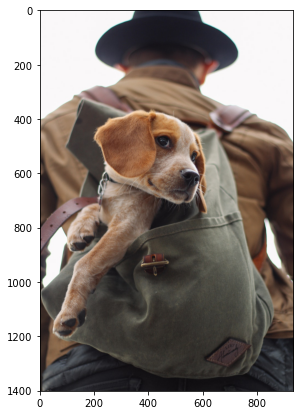

In [9]:
# increae canvas space
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(122)
ax.imshow(img_rgb)

### 2. Resize image

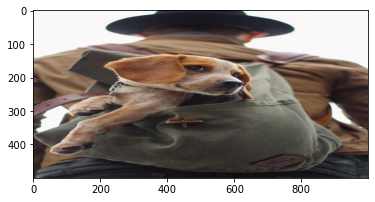

In [10]:
#resize img
new_img=cv2.resize(img_rgb,(1000,500)) #1000 replace for 934 and 500 replace to 1000
plt.imshow(new_img)

(700, 467, 3)


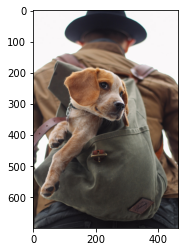

In [11]:
w_ratio = 0.5
h_ratio = 0.5
new_img = cv2.resize(img_rgb,(0,0),img_rgb,w_ratio,h_ratio)
plt.imshow(new_img)
print(new_img.shape)

### 1.3 Flip image

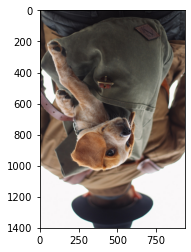

In [12]:
#flip img
'''
1  ->  Verical flip
0  ->  Horizontal flip
-1 ->  Veritical and horizontal flip
'''
new_img = cv2.flip(img_rgb,0)
plt.imshow(new_img)

### 1.4 Save image
#### cv2.imwrite automatically convert BGR to RGB for saving



In [13]:
cv2.imwrite('hehe.jpg',img)

True

### 1.5 Open image on separate window
#### use keyboard to close the picture, do not use close button and remember to use cv2.destroyAllWindows

In [14]:
# normal display, can contain some unknown error due to conflict with system os
img = cv2.imread('hehe.jpg')
cv2.imshow('window_name',img)
k = cv2.waitKey(0)
if k == ord("s"):
    cv2.imwrite("starry_night.png", img) # save and then close
cv2.destroyAllWindows()


In [15]:
# better method to avoid many unknow error, should use .py script
img = cv2.imread('hehe.jpg')

while True:
    cv2.imshow('hehe.jpg',img)
    if cv2.waitKey(1) & 0xFF == ord('s'): # press s to save after 1ms
        cv2.imwrite("starry_night.png", img)
    if cv2.waitKey(1) & 0xFF == ord('q'): # press q to quit after 1ms
        break
cv2.destroyAllWindows()

### 1.6 Drawing on image

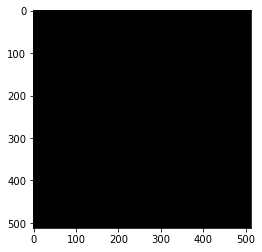

In [16]:
blank_img = np.zeros(shape=(512,512,3),dtype=np.int16)
plt.imshow(blank_img)

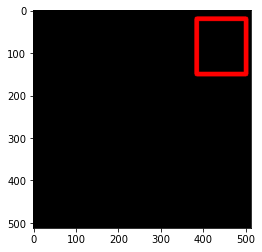

In [17]:
# Draw rectangle 
cv2.rectangle(blank_img,pt1=(384,20),pt2=(500,150),color=(255,0,0),thickness=10)
plt.imshow(blank_img)

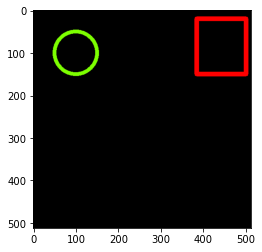

In [18]:
# Draw cirle
cv2.circle(img=blank_img,center=(100,100),radius=50,color=(125,255,0),thickness=8)
plt.imshow(blank_img)

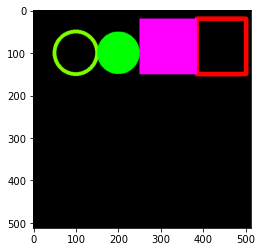

In [19]:
# draw fill-in rectangle and circle
cv2.rectangle(blank_img,pt1=(384,20),pt2=(250,150),color=(255,0,255),thickness=-1)
cv2.circle(img=blank_img,center=(200,100),radius=50,color=(0,255,0),thickness=-1)
plt.imshow(blank_img)

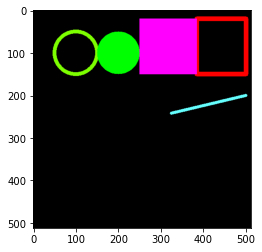

In [20]:
# draw line
cv2.line(blank_img,pt1=(500,200),pt2=(324,242),color=(102,255,255),thickness=5)
plt.imshow(blank_img)

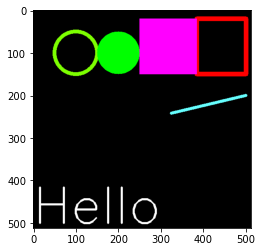

In [21]:
# texting on 
font = cv2.FONT_HERSHEY_SIMPLEX
cv2.putText(blank_img,text='Hello',org=(0,500),fontFace=font,fontScale=4,
            thickness=3,color=(255,255,255),lineType=cv2.LINE_AA)
plt.imshow(blank_img)

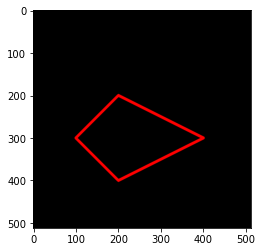

In [35]:
# polygon
blank_img = np.zeros(shape=(512,512,3),dtype=np.int32)
vertices = np.array([[100,300],[200,200],[400,300],[200,400]],dtype=np.int32)
pts = vertices.reshape((-1,1,2)) # chagng to 3 dim
cv2.polylines(blank_img,[pts],isClosed=True,color=(255,0,0),thickness=5)
plt.imshow(blank_img)


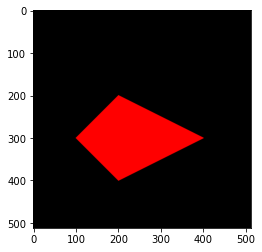

In [37]:
# draw fill-in polygon
blank_img = np.zeros(shape=(512,512,3),dtype=np.int32)
vertices = np.array([[100,300],[200,200],[400,300],[200,400]],dtype=np.int32)
pts = vertices.reshape((-1,1,2)) # chagng to 3 dim
cv2.fillPoly(blank_img,[pts],color=(255,0,0))
plt.imshow(blank_img)

In [30]:
# Draw with mouse on separate window
def draw_circle(event,x,y,flags,param):
    if event == cv2.EVENT_LBUTTONDOWN: # click left mouse down
        cv2.circle(blank_img,(x,y),radius=100,color=(0,255,0),thickness=-1)
    elif event == cv2.EVENT_RBUTTONDOWN:
        cv2.circle(blank_img,(x,y),radius=100,color=(255,0,0),thickness=-1)

# connect drawing function to the window
cv2.namedWindow(winname='my_drawing')
cv2.setMouseCallback('my_drawing',draw_circle)

blank_img = np.zeros((512,512,3),dtype=np.int8)
while True:
    cv2.imshow('my_drawing',blank_img)
    if cv2.waitKey(20) & 0xFF == ord('q'):
        break
cv2.destroyAllWindows()

In [33]:
# we have 'clicking draw above' what about 'dragging draw'

# VARIABLE
drawing = False
ix = -1
iy = -1
def draw_rectangle(event,x,y,flags,param):
    global ix,iy,drawing
    if event == cv2.EVENT_LBUTTONDOWN:
        drawing = True
        ix,iy=x,y
    
    elif event == cv2.EVENT_MOUSEMOVE:
        if drawing == True:
            cv2.rectangle(blank_img,(ix,iy),(x,y),(0,255,0),-1)
    
    elif event == cv2.EVENT_LBUTTONUP:
        drawing = False
        cv2.rectangle(blank_img,(ix,iy),(x,y),(0,255,0),-1)
# connect drawing function to the window
cv2.namedWindow(winname='my_drawing')
cv2.setMouseCallback('my_drawing',draw_rectangle)


blank_img = np.zeros((512,512,3),dtype=np.int8)
while True:
    cv2.imshow('my_drawing',blank_img)
    if cv2.waitKey(20) & 0xFF == ord('q'):
        break
cv2.destroyAllWindows()

## 2. Getting start with Videos

#### 2.1 Connect to built-in camera

In [43]:
cap = cv2.VideoCapture(0) # capture the default webcam

# to fully capture
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH)) 
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

# fourcc is video codec, for window use *'DVIX' as paraeter
# mac and linux use *'XVID'
writer = cv2.VideoWriter('myvideo.mp4',cv2.VideoWriter_fourcc(*'DVIX'),20,(width,height))

while True:
    ret,frame = cap.read()
    # operation
    writer.write(frame)
    # gray = cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)

    cv2.imshow('frame',frame)

    if cv2.waitKey(1)& 0xFF == ord('q'):
        break
cap.release()
writer.release()
cv2.destroyAllWindows()


#### 2.2 Open a video file

In [44]:
import time

cap = cv2.VideoCapture('myvideo.mp4')

if cap.isOpened() == False:
    print('FILE NOT FOUND OR WRONG CODEC')

while cap.isOpened():

    ret,frame = cap.read()

    if ret == True:
        time.sleep(1/20) # 20FPS framerate
        cv2.imshow('frame',frame)

        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    
    else:
        break

cap.release()
cv2.destroyAllWindows()

#### 2.3 Drawing on live camera

In [45]:
cap = cv2.VideoCapture(0) # capture the default webcam

# to fully capture
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH)) 
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

# top left coner
x = width // 2
y = height // 2

# wid and hei of Rectangle
w = width // 4
h = height // 4


while True:
    ret,frame = cap.read()
    # operation

    cv2.rectangle(frame,(x,y),(x+w,y+h),color = (0,0,255),thickness = 4)
    cv2.imshow('frame',frame)

    if cv2.waitKey(1)& 0xFF == ord('q'):
        break
cap.release()

cv2.destroyAllWindows()

In [47]:
# drawing with mouse
cap = cv2.VideoCapture(0) # capture the default webcam


## Callback funtion
def draw_rectangle(event,x,y,flags,param):
    global pt1,pt2,topLeft_clicked,botRight_clicked
    if event == cv2.EVENT_LBUTTONDOWN:

        # Erase rectangle
        if topLeft_clicked and botRight_clicked:
            pt1 = (0,0)
            pt2 = (0,0)
            topLeft_clicked = False
            botRight_clicked = False
        
        if topLeft_clicked == False:
            pt1 = (x,y)
            topLeft_clicked = True
        
        elif botRight_clicked == False:
            pt2 = (x,y)
            botRight_clicked = True

    pass
## Global variable
pt1 = (0,0)
pt2 = (0,0)
topLeft_clicked = False
botRight_clicked = False

## connect to callback
cv2.namedWindow('Test')
cv2.setMouseCallback('Test',draw_rectangle)

while True:
    ret,frame = cap.read()
    # operation
    if topLeft_clicked:
        cv2.circle(frame,center = pt1, radius = 2,color=(0,0,255),thickness=-1)
    if topLeft_clicked and botRight_clicked:
        cv2.rectangle(frame,pt1,pt2,(0,0,255),3)

    cv2.imshow('Test',frame)

    if cv2.waitKey(1)& 0xFF == ord('q'):
        break
cap.release()

cv2.destroyAllWindows()